In [34]:
import sys
sys.path.insert(0, "../..")

import numpy as np
from matplotlib import pyplot as plt

from module.base.network import Network
from module.simulation.meanfield import MeanField
import module.components.CONST as CONST

In [35]:
net_sizes = np.arange(2, 11)
size_index = 5
net_sizes[size_index]

7

In [42]:
N = net_sizes[size_index]
size_str = str(N) + "x" + str(N) + ".csv"

## Load MF data
mf_means = np.loadtxt("../../data/large_sys/mf/mf_states" + size_str)
mf_convergence = np.loadtxt("../../data/large_sys/mf/mf_convergence" + size_str)
mf_currents = np.loadtxt("../../data/large_sys/mf/mf_currents" + size_str)

## Load MF2 data
mf2_means = np.loadtxt("../../data/large_sys/mf2/means" + size_str)
mf2_currents = np.loadtxt("../../data/large_sys/mf2/currents" + size_str)
mf2_vars = np.loadtxt("../../data/large_sys/mf2/vars"+ size_str)
mf2_conv_means = np.loadtxt("../../data/large_sys/mf2/conv_means" + size_str)

## Load KMC data
kmc_means = np.loadtxt("../../data/large_sys/kmc/kmc_states" + size_str)
kmc_steps = np.loadtxt("../../data/large_sys/kmc/kmc_steps" + size_str)
kmc_currents = np.loadtxt("../../data/large_sys/kmc/kmc_currents" + size_str)
kmc_errs = np.loadtxt("../../data/large_sys/kmc/kmc_errs" + size_str)

## valid indices
cond = np.logical_and(kmc_currents > 0.01, kmc_steps < 2e7)
cond = np.logical_and(cond, mf_convergence < 1e-3)
cond = np.logical_and(cond, mf2_conv_means < 0.1)
valid_indices = np.where(cond)[0]

In [43]:
MAE = np.mean(np.abs(mf_means - kmc_means), axis = - 1)
rel_err = np.abs((mf_currents - kmc_currents)/kmc_currents)

In [44]:
MAE2 = np.mean(np.abs(mf2_means - kmc_means), axis = - 1)
rel_err2 = np.abs((mf2_currents - kmc_currents)/kmc_currents)

In [45]:
MAE2_result = np.mean(MAE2[valid_indices])
rel_err2_result = np.mean(rel_err2[valid_indices])
print("MAE2:", MAE2_result, "electron charges")
print("rel_err2:", rel_err2_result*100, "%")

MAE2: 0.04645273803615106 electron charges
rel_err2: 5.09533370705938 %


In [46]:
MAE_result = np.mean(MAE[valid_indices])
rel_err_result = np.mean(rel_err[valid_indices])
print("MAE:", MAE_result, "electron charges")
print("rel_err:", rel_err_result*100, "%")

MAE: 0.07070804739548454 electron charges
rel_err: 14.209442675359174 %


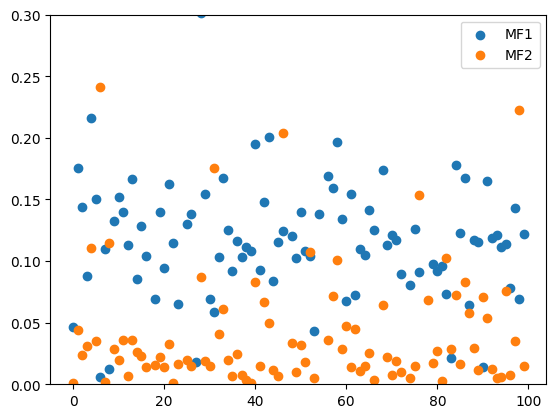

In [47]:
plt.scatter(np.arange(100), rel_err, label = "MF1")
plt.scatter(np.arange(100), rel_err2, label = "MF2")
plt.ylim(0,0.3)
plt.legend()

Text(0.5, 1.0, 'output current comparison')

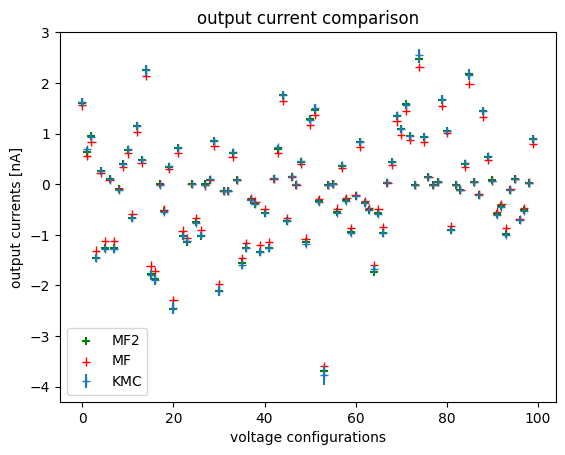

In [8]:
plt.errorbar(np.arange(100), kmc_currents, yerr = kmc_errs, linestyle = "", marker = "+", label = "KMC")
plt.scatter(np.arange(100), mf2_currents, marker = "+", label = "MF2", color = "g")
plt.scatter(np.arange(100), mf_currents, marker = "+", linestyle = "", label = "MF", color = "r")
plt.legend()
plt.xlabel("voltage configurations")
plt.ylabel("output currents [nA]")
plt.title("output current comparison")